# Launch TuriCreate

In [1]:
import turicreate as tc

# Load dataset


In [2]:
image_train = tc.SFrame('image_train_data/')
image_test = tc.SFrame('image_test_data/')

# Question 1

In [6]:
sketch = tc.Sketch(image_train['label'])

In [7]:
sketch     #ans


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


# Question 2

In [9]:
cat_train = image_train[image_train['label']=='cat']
dog_train = image_train[image_train['label']=='dog']
bird_train = image_train[image_train['label']=='bird']
automobile_train = image_train[image_train['label']=='automobile']

In [11]:
cat_knn_model = tc.nearest_neighbors.create(cat_train, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [12]:
dog_knn_model = tc.nearest_neighbors.create(dog_train, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [13]:
bird_knn_model = tc.nearest_neighbors.create(bird_train, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [14]:
automobile_knn_model = tc.nearest_neighbors.create(automobile_train, features=['deep_features'], label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [15]:
def get_image_from_ids(query):
    return image_train.filter_by(query['reference_label'],'id')

In [17]:
cat_test = image_test[0:1]

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 13.385ms     |

| Done         |         | 100         | 25.843ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

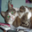
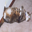
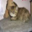
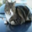
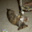

In [18]:
get_image_from_ids(cat_knn_model.query(cat_test))['image'].explore()     #ans1

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 5.368ms      |

| Done         |         | 100         | 24.87ms      |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

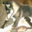
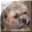
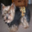
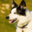
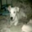

In [19]:
get_image_from_ids(dog_knn_model.query(cat_test))['image'].explore()     #ans2

# Question 3

In [21]:
q3a = cat_knn_model.query(cat_test)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 5.585ms      |

| Done         |         | 100         | 23.865ms     |

+--------------+---------+-------------+--------------+

In [22]:
q3a

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


In [23]:
q3a['distance'].mean()     #ans

36.15573070978294

In [24]:
q3b = dog_knn_model.query(cat_test)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 5.679ms      |

| Done         |         | 100         | 22.632ms     |

+--------------+---------+-------------+--------------+

In [25]:
q3b

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


In [26]:
q3b['distance'].mean()     #ans

37.77071136184157

# Question 4

In [27]:
cat_test = image_test[image_test['label']=='cat']
dog_test = image_test[image_test['label']=='dog']
bird_test = image_test[image_test['label']=='bird']
automobile_test = image_test[image_test['label']=='automobile']

In [34]:
dog_cat_neighbors = cat_knn_model.query(dog_test, k=1)
bird_cat_neighbors = cat_knn_model.query(bird_test, k=1)
automobile_cat_neighbors = cat_knn_model.query(automobile_test, k=1)
cat_cat_neighbors = cat_knn_model.query(cat_test, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 42000   | 8.25147     | 235.374ms    |

| Done         | 509000  | 100         | 269.682ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 43000   | 8.44794     | 234.272ms    |

| Done         | 509000  | 100         | 256.351ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 42000   | 8.25147     | 237.108ms    |

| Done         | 509000  | 100         | 281.608ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 43000   | 8.44794     | 244.52ms     |

| Done         | 509000  | 100         | 283.557ms    |

+--------------+---------+-------------+--------------+

In [33]:
dog_dog_neighbors = dog_knn_model.query(dog_test, k=1)
cat_dog_neighbors = dog_knn_model.query(cat_test, k=1)
bird_dog_neighbors = dog_knn_model.query(bird_test, k=1)
automobile_dog_neighbors = dog_knn_model.query(automobile_test, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 42000   | 8.25147     | 223.413ms    |

| Done         | 509000  | 100         | 262.05ms     |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 42000   | 8.25147     | 230.518ms    |

| Done         | 509000  | 100         | 274.566ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 43000   | 8.44794     | 242.997ms    |

| Done         | 509000  | 100         | 264.327ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 42000   | 8.25147     | 213.929ms    |

| Done         | 509000  | 100         | 249.642ms    |

+--------------+---------+-------------+--------------+

In [35]:
bird_bird_neighbors = bird_knn_model.query(bird_test, k=1)
cat_bird_neighbors = bird_knn_model.query(cat_test, k=1)
dog_bird_neighbors = bird_knn_model.query(dog_test, k=1)
automobile_bird_neighbors = bird_knn_model.query(automobile_test, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 39000   | 8.159       | 233.84ms     |

| Done         | 478000  | 100         | 274.611ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 39000   | 8.159       | 219.974ms    |

| Done         | 478000  | 100         | 269.094ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 39000   | 8.159       | 226.251ms    |

| Done         | 478000  | 100         | 269.42ms     |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 40000   | 8.3682      | 228.927ms    |

| Done         | 478000  | 100         | 269.956ms    |

+--------------+---------+-------------+--------------+

In [36]:
automobile_automobile_neighbors = automobile_knn_model.query(automobile_test, k=1)
cat_automobile_neighbors = automobile_knn_model.query(cat_test, k=1)
dog_automobile_neighbors = automobile_knn_model.query(dog_test, k=1)
bird_automobile_neighbors = automobile_knn_model.query(bird_test, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 42000   | 8.25147     | 240.659ms    |

| Done         | 509000  | 100         | 261.924ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 42000   | 8.25147     | 233.849ms    |

| Done         | 509000  | 100         | 296.459ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 43000   | 8.44794     | 235.446ms    |

| Done         | 509000  | 100         | 260.537ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 12

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 42000   | 8.25147     | 230.746ms    |

| Done         | 509000  | 100         | 261.643ms    |

+--------------+---------+-------------+--------------+

In [37]:
dog_distances = tc.SFrame({'dog-dog': dog_dog_neighbors['distance'],'dog-cat': cat_dog_neighbors['distance'], 'dog-bird': bird_dog_neighbors['distance'], 'dog-automobile': automobile_dog_neighbors['distance']})

In [38]:
dog_distances

dog-automobile,dog-bird,dog-cat,dog-dog
42.302582635574396,50.51123537831657,37.464262878423845,33.47735903726335
43.138619657492214,37.83014370145973,29.347231958505894,32.84584956840554
40.24165344091786,37.67910757833515,32.259964047497306,35.03970731890584
46.84669160445324,49.586018314135316,35.385208518819475,33.90103276968193
52.37952897363818,42.73161338540937,30.04429850876174,37.484925090925636
49.446515316564444,48.73938045492006,35.4741000423819,34.94516534398124
45.60351187400346,35.159041465506434,32.58452752259978,39.095727834463545
55.503603621864514,38.396371410718395,37.650285261439834,37.76961310322034
49.09222632540127,44.91342261967623,36.98013535120841,35.10891446032838
45.401747706959604,37.75506318625136,41.12594107067673,43.242283258453455


In [39]:
def is_dog_correct(row):
    if (row['dog-dog'] < row['dog-cat']) and (row['dog-dog'] < row['dog-bird']) and (row['dog-dog'] < row['dog-automobile']):
        return 1
    else:
        return 0

In [40]:
q4 = dog_distances.apply(is_dog_correct)

In [41]:
q4

dtype: int
Rows: 1000
[1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, ... ]

In [42]:
q4.sum()     #ans

541